<a href="https://colab.research.google.com/github/Rahulx911/grid-6.0/blob/main/Total_Object_Dectection_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
!pip install ensemble-boxes  # Install the 'ensemble-boxes' library
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install YOLOv5 dependencies


Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 23.62 MiB/s, done.
Resolving deltas: 100% (11717/11717), done.
/content/yolov5


In [ ]:
!pip install --upgrade torchvision

In [ ]:
!pip install --upgrade torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [4]:
!pip install ensemble-boxes  # Install the 'ensemble-boxes' library
!pip install ultralytics  # Install YOLOv5 from Ultralytics


In [15]:
!pip install torchvision opencv-python

In [28]:
!pip install paddleocr paddlepaddle torchvision opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 544.7/544.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114261 sha256=14d359a2995461a337c6f9eacea52d9f594debbc92d0a2013e4bbe8288d023a3
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497

In [29]:
!pip install paddleocr
!pip install paddlepaddle


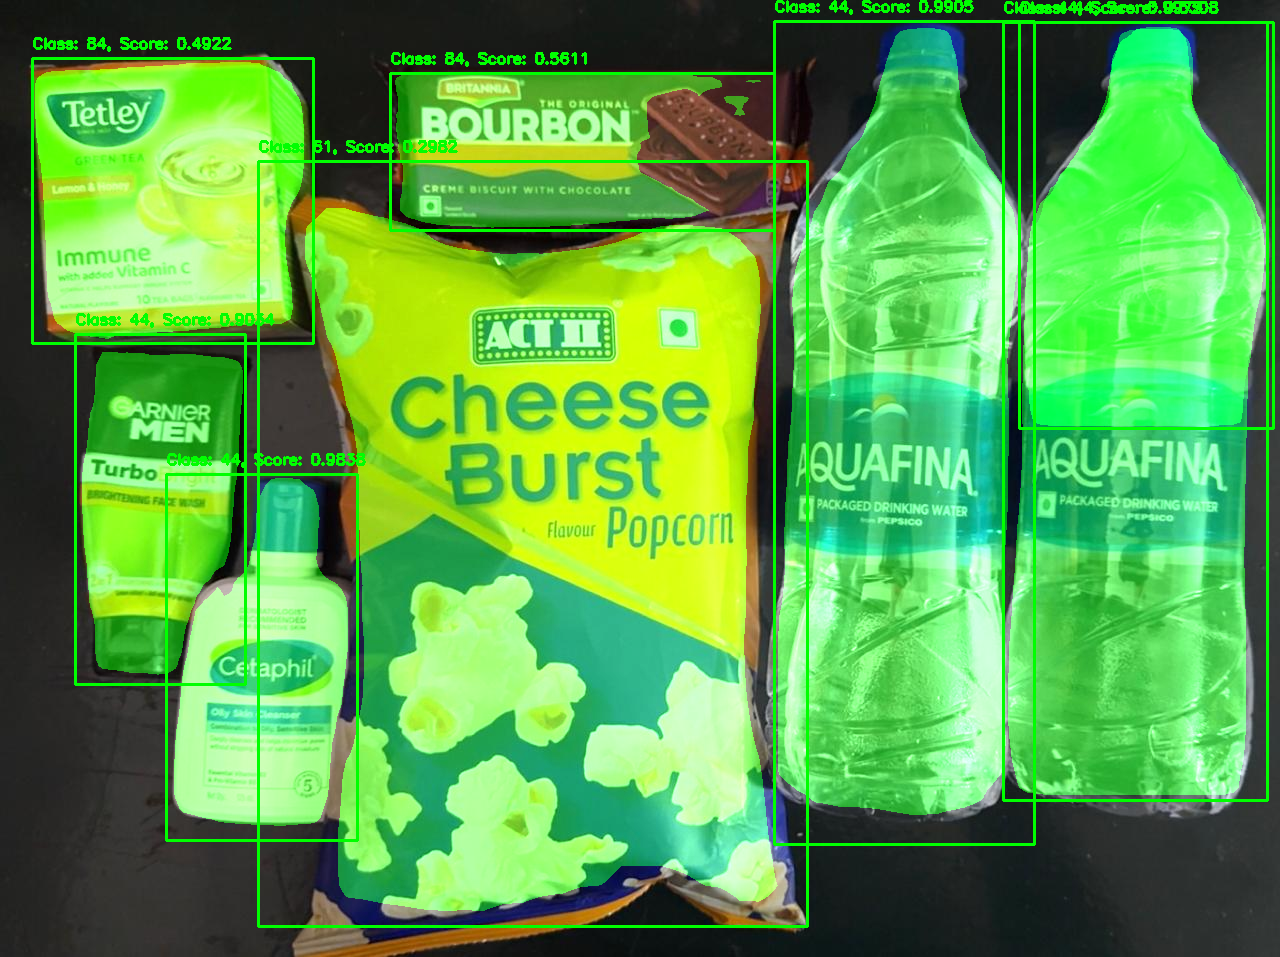

Total detected objects with score > 0.20: 8


In [27]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from torchvision.ops import nms
from google.colab.patches import cv2_imshow

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Load the image
img_path = "/content/5.jpeg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
height, width, _ = img.shape

# Convert the image to a tensor
img_tensor = F.to_tensor(img_rgb).unsqueeze(0)  # Add batch dimension

# Perform object detection
with torch.no_grad():
    predictions = model(img_tensor)[0]

# Filter predictions with confidence threshold
score_threshold = 0.126
boxes = predictions["boxes"]
scores = predictions["scores"]
labels = predictions["labels"]
masks = predictions["masks"]

# Apply NMS to remove overlapping boxes
nms_threshold = 0.5  # IoU threshold for NMS
keep_indices = nms(boxes, scores, nms_threshold)

# Keep only the boxes, scores, labels, and masks that survive NMS
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy()
masks = masks[keep_indices].cpu().numpy()

# Further filter to keep only boxes with scores greater than 0.20
final_boxes = []
final_scores = []
final_labels = []
final_masks = []

for i, score in enumerate(scores):
    if score >= 0.2980:
        final_boxes.append(boxes[i])
        final_scores.append(score)
        final_labels.append(labels[i])
        final_masks.append(masks[i])

# Convert lists back to numpy arrays
final_boxes = np.array(final_boxes)
final_scores = np.array(final_scores)
final_labels = np.array(final_labels)
final_masks = np.array(final_masks)

# Draw bounding boxes and masks
for i, (box, mask) in enumerate(zip(final_boxes, final_masks)):
    x1, y1, x2, y2 = map(int, box)
    mask = mask[0] > 0.7  # Binary mask

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"Class: {final_labels[i]}, Score: {final_scores[i]:.4f}"
    cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Apply mask with transparency
    colored_mask = np.zeros_like(img, dtype=np.uint8)
    colored_mask[mask] = [0, 255, 0]  # Green mask
    img = cv2.addWeighted(img, 1.0, colored_mask, 0.5, 0)

# Display the final image
cv2_imshow(img)
print(f"Total detected objects with score > 0.20: {len(final_boxes)}")


[2024/12/09 13:49:14] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

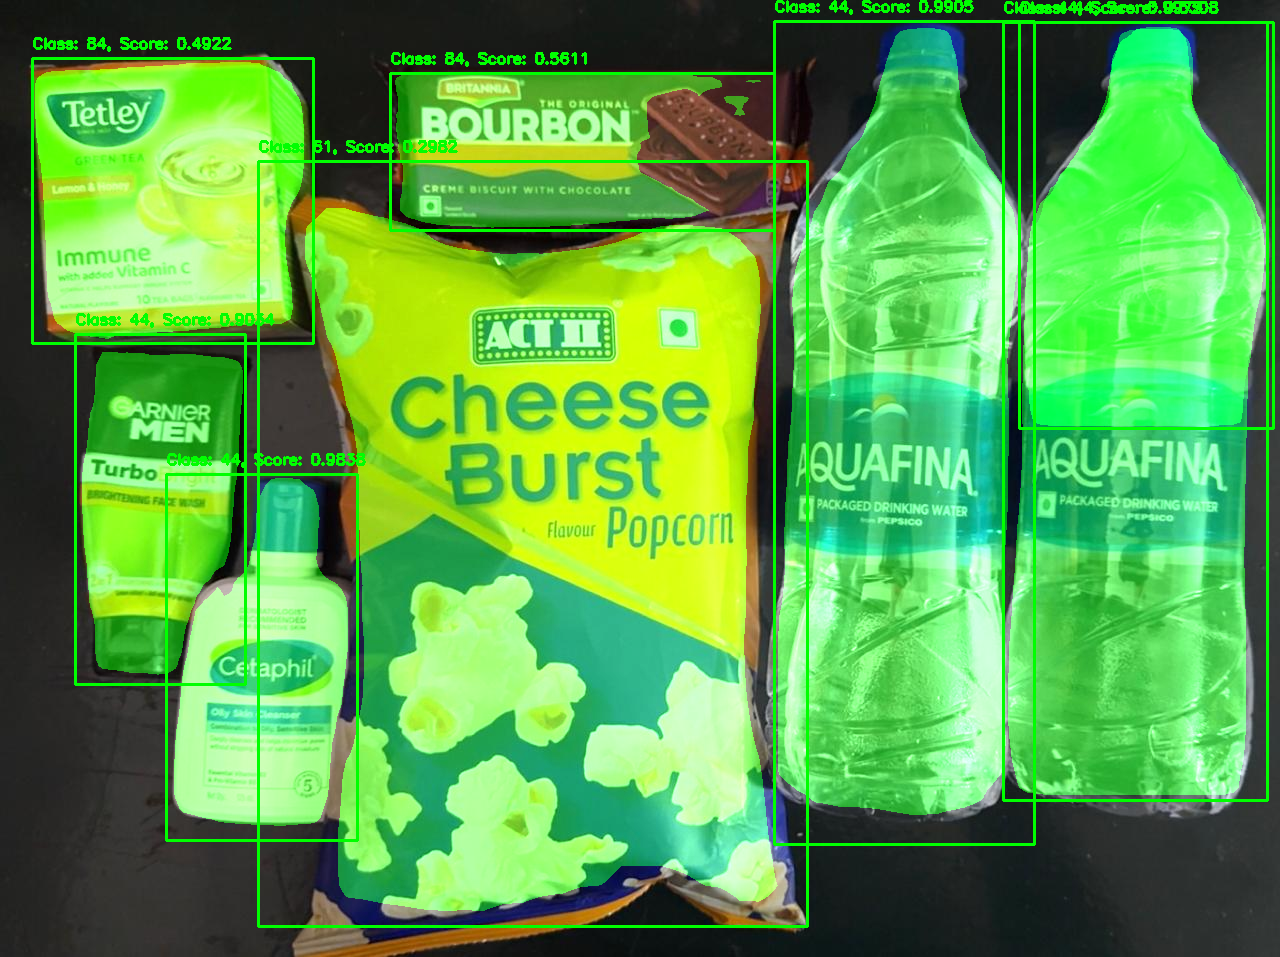

Total detected objects with score >= 0.2980: 8

Class 44:
  - AQUAFINA PEPSICO
  - AQUAFINA PACKAGEDDRINKING WATER tPEPSICO
  - Cetaphil
  - GARNIER MEN TurboBright ERICKTNING FACE WESH
  - No text detected

Class 84:
  - BRITANNIA BOURBON CREME BISCUIT WITH CHOCOLATE
  - Tetley GREEN TEA Lemon &Honey Immune with adse Vitamin C 10TEA

Class 61:
  - REME BISCUIT WITH CHOCOLATE ACL Cheese Burst Popcorn Flavour aphil


In [40]:
import torch
import torchvision
from torchvision.transforms import functional as F
import cv2
import numpy as np
from torchvision.ops import nms
from google.colab.patches import cv2_imshow
from paddleocr import PaddleOCR

# Load the pre-trained Mask R-CNN model
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")  # Use English language model

# Load the image
img_path = "/content/5.jpeg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
height, width, _ = img.shape

# Convert the image to a tensor
img_tensor = F.to_tensor(img_rgb).unsqueeze(0)  # Add batch dimension

# Perform object detection
with torch.no_grad():
    predictions = model(img_tensor)[0]

# Filter predictions with confidence threshold
score_threshold = 0.126
boxes = predictions["boxes"]
scores = predictions["scores"]
labels = predictions["labels"]
masks = predictions["masks"]

# Apply NMS to remove overlapping boxes
nms_threshold = 0.5  # IoU threshold for NMS
keep_indices = nms(boxes, scores, nms_threshold)

# Keep only the boxes, scores, labels, and masks that survive NMS
boxes = boxes[keep_indices].cpu().numpy()
scores = scores[keep_indices].cpu().numpy()
labels = labels[keep_indices].cpu().numpy()
masks = masks[keep_indices].cpu().numpy()

# Further filter to keep only boxes with scores greater than 0.2980
final_boxes = []
final_scores = []
final_labels = []
final_masks = []

for i, score in enumerate(scores):
    if score >= 0.2980:
        final_boxes.append(boxes[i])
        final_scores.append(score)
        final_labels.append(labels[i])
        final_masks.append(masks[i])

# Convert lists back to numpy arrays
final_boxes = np.array(final_boxes)
final_scores = np.array(final_scores)
final_labels = np.array(final_labels)
final_masks = np.array(final_masks)

# OCR Results dictionary
ocr_results = {}

# Draw bounding boxes, masks, and perform OCR
for i, (box, mask) in enumerate(zip(final_boxes, final_masks)):
    x1, y1, x2, y2 = map(int, box)
    mask = mask[0] > 0.7  # Binary mask

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    text = f"Class: {final_labels[i]}, Score: {final_scores[i]:.4f}"
    cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Apply mask with transparency
    colored_mask = np.zeros_like(img, dtype=np.uint8)
    colored_mask[mask] = [0, 255, 0]  # Green mask
    img = cv2.addWeighted(img, 1.0, colored_mask, 0.5, 0)

    # Crop the detected region for OCR
    cropped_region = img_rgb[y1:y2, x1:x2]

    # Perform OCR on the cropped region
    ocr_result = ocr.ocr(cropped_region, cls=True)
    ocr_text = " ".join([line[1][0] for line in ocr_result[0]]) if ocr_result[0] else "No text detected"

    # Store OCR result by class
    class_label = f"Class {final_labels[i]}"
    if class_label not in ocr_results:
        ocr_results[class_label] = []
    ocr_results[class_label].append(ocr_text)

# Display the final image
cv2_imshow(img)

# Print OCR results class-wise
print(f"Total detected objects with score >= 0.2980: {len(final_boxes)}")
for class_label, texts in ocr_results.items():
    print(f"\n{class_label}:")
    for text in texts:
        print(f"  - {text}")
